In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

Store - the store number

Date - the week of sales

Weekly_Sales -  sales for the given store

Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

Temperature - Temperature on the day of sale

Fuel_Price - Cost of fuel in the region

CPI – Prevailing consumer price index

Unemployment - Prevailing unemployment rate

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

Which store has maximum sales

Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

Which store/s has good quarterly growth rate in Q3’2012

Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

Provide a monthly and semester view of sales in units and give insights

For Store 1 – Build  prediction models to forecast demand

Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

Change dates into days by creating new variable.

In [6]:
df = pd.read_csv('Walmart_Store_sales.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [41]:
max_sales = df.groupby('Store')['Weekly_Sales'].sum()
max_sales.idxmax()

20

In [42]:
print(max_sales)

Store
1     2.224028e+08
2     2.753824e+08
3     5.758674e+07
4     2.995440e+08
5     4.547569e+07
6     2.237561e+08
7     8.159828e+07
8     1.299512e+08
9     7.778922e+07
10    2.716177e+08
11    1.939628e+08
12    1.442872e+08
13    2.865177e+08
14    2.889999e+08
15    8.913368e+07
16    7.425243e+07
17    1.277821e+08
18    1.551147e+08
19    2.066349e+08
20    3.013978e+08
21    1.081179e+08
22    1.470756e+08
23    1.987506e+08
24    1.940160e+08
25    1.010612e+08
26    1.434164e+08
27    2.538559e+08
28    1.892637e+08
29    7.714155e+07
30    6.271689e+07
31    1.996139e+08
32    1.668192e+08
33    3.716022e+07
34    1.382498e+08
35    1.315207e+08
36    5.341221e+07
37    7.420274e+07
38    5.515963e+07
39    2.074455e+08
40    1.378703e+08
41    1.813419e+08
42    7.956575e+07
43    9.056544e+07
44    4.329309e+07
45    1.123953e+08
Name: Weekly_Sales, dtype: float64


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

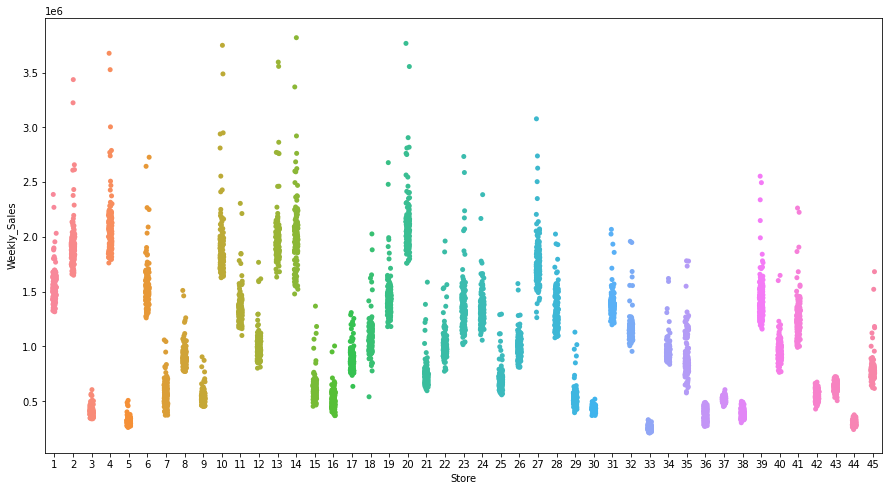

In [43]:
plt.figure(figsize = (15,8))
sns.stripplot('Store','Weekly_Sales', data=df)

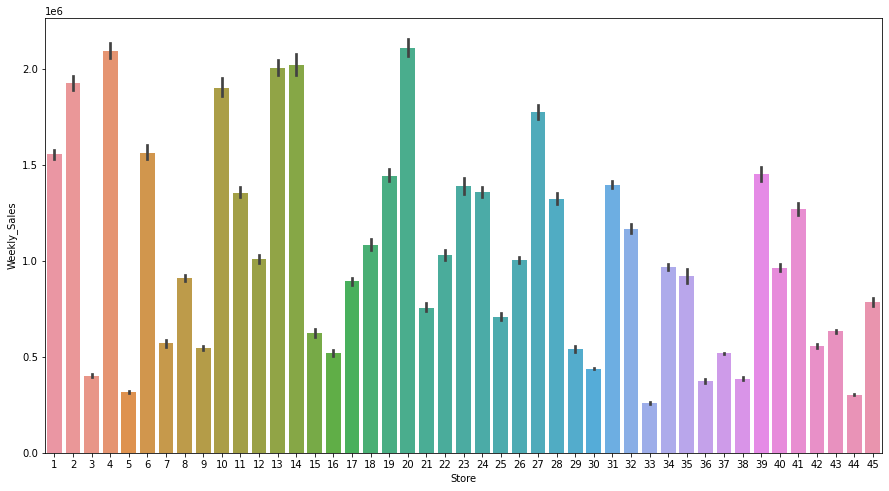

In [46]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x='Store', y='Weekly_Sales', data=df)

Which store has maximum standard deviation i.e., the sales vary a lot. 
Also, find out the coefficient of mean to standard deviation

In [50]:
max_std=df.groupby('Store')['Weekly_Sales'].std()
max_std.idxmax()

14

In [51]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [62]:
coefficient_of_varience=(5.643666e+05/1.046965e+06)*100
print(coefficient_of_varience,'%')

53.90501115128012 %


In [53]:
df_store14=df.loc[df['Store']==14]
df_store14

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1859,14,05-02-2010,2623469.95,0,27.31,2.784,181.871190,8.992
1860,14,12-02-2010,1704218.84,1,27.73,2.773,181.982317,8.992
1861,14,19-02-2010,2204556.70,0,31.27,2.745,182.034782,8.992
1862,14,26-02-2010,2095591.63,0,34.89,2.754,182.077469,8.992
1863,14,05-03-2010,2237544.75,0,37.13,2.777,182.120157,8.992
...,...,...,...,...,...,...,...,...
1997,14,28-09-2012,1522512.20,0,64.88,3.997,192.013558,8.684
1998,14,05-10-2012,1687592.16,0,64.89,3.985,192.170412,8.667
1999,14,12-10-2012,1639585.61,0,54.47,4.000,192.327265,8.667
2000,14,19-10-2012,1590274.72,0,56.47,3.969,192.330854,8.667


In [54]:
df_store14.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,143.0,1.430000e+02,143.000000,143.000000,143.000000,143.000000,143.000000
mean,14.0,2.020978e+06,0.069930,57.790979,3.417608,186.285678,8.648748
std,0.0,3.175699e+05,0.255926,16.271612,0.443029,3.594820,0.151460
min,14.0,1.479515e+06,0.000000,24.050000,2.699000,181.646815,8.424000
25%,14.0,1.873298e+06,0.000000,45.585000,2.921000,182.619515,8.523000
50%,14.0,2.004330e+06,0.000000,58.850000,3.541000,185.937438,8.625000
75%,14.0,2.125780e+06,0.000000,72.585000,3.809000,189.924736,8.724000
max,14.0,3.818686e+06,1.000000,82.990000,4.066000,192.330854,8.992000


In [61]:
coefficient_of_varience_store14=(3.175699e+05/2.020978e+06)*100
print(coefficient_of_varience_store14,'%')

15.71367427057593 %


Which store/s has good quarterly growth rate in Q3’2012

In [63]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [66]:
df['Date']=df['Date'].astype("datetime64")

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '26-03-2010' in DD/MM/YYYY format. Provide format or sp

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [68]:
df['Date'].unique()

array(['2010-05-02T00:00:00.000000000', '2010-12-02T00:00:00.000000000',
       '2010-02-19T00:00:00.000000000', '2010-02-26T00:00:00.000000000',
       '2010-05-03T00:00:00.000000000', '2010-12-03T00:00:00.000000000',
       '2010-03-19T00:00:00.000000000', '2010-03-26T00:00:00.000000000',
       '2010-02-04T00:00:00.000000000', '2010-09-04T00:00:00.000000000',
       '2010-04-16T00:00:00.000000000', '2010-04-23T00:00:00.000000000',
       '2010-04-30T00:00:00.000000000', '2010-07-05T00:00:00.000000000',
       '2010-05-14T00:00:00.000000000', '2010-05-21T00:00:00.000000000',
       '2010-05-28T00:00:00.000000000', '2010-04-06T00:00:00.000000000',
       '2010-11-06T00:00:00.000000000', '2010-06-18T00:00:00.000000000',
       '2010-06-25T00:00:00.000000000', '2010-02-07T00:00:00.000000000',
       '2010-09-07T00:00:00.000000000', '2010-07-16T00:00:00.000000000',
       '2010-07-23T00:00:00.000000000', '2010-07-30T00:00:00.000000000',
       '2010-06-08T00:00:00.000000000', '2010-08-13

In [76]:
df['year']=pd.DatetimeIndex(df['Date']).year
df['month']=pd.DatetimeIndex(df['Date']).month

In [77]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5


In [79]:
df_2012=df.loc[df['year']==2012]
df_2012

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
100,1,2012-06-01,1550369.92,0,49.01,3.157,219.714258,7.348,2012,6
101,1,2012-01-13,1459601.17,0,48.53,3.261,219.892526,7.348,2012,1
102,1,2012-01-20,1394393.84,0,54.11,3.268,219.985689,7.348,2012,1
103,1,2012-01-27,1319325.59,0,54.26,3.290,220.078852,7.348,2012,1
104,1,2012-03-02,1636339.65,0,56.55,3.360,220.172015,7.348,2012,3
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,12
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10


#q1 = months(1,2,3)
#q2 = months(4,5,6)
#q3 = months(7,8,9)
#q4 = months(10,11,12)

In [80]:
df_2012_q3=df_2012.loc[(df['month']>6)&(df['month']<10)]
df_2012_q3

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
109,1,2012-09-03,1675431.16,0,58.76,3.669,221.059189,7.348,2012,9
122,1,2012-08-06,1697230.96,0,78.30,3.452,221.749484,7.143,2012,8
127,1,2012-07-13,1527014.04,0,77.12,3.256,221.924158,6.908,2012,7
128,1,2012-07-20,1497954.76,0,80.42,3.311,221.932727,6.908,2012,7
129,1,2012-07-27,1439123.71,0,82.66,3.407,221.941295,6.908,2012,7
...,...,...,...,...,...,...,...,...,...,...
6426,45,2012-08-31,734297.87,0,75.09,3.867,191.461281,8.684,2012,8
6427,45,2012-07-09,766512.66,1,75.70,3.911,191.577676,8.684,2012,7
6428,45,2012-09-14,702238.27,0,67.87,3.948,191.699850,8.684,2012,9
6429,45,2012-09-21,723086.20,0,65.32,4.038,191.856704,8.684,2012,9


In [82]:
max_sales_2012_q3=df_2012_q3.groupby('Store')['Weekly_Sales'].sum()
max_sales_2012_q3.idxmax()

4

Some holidays have a negative impact on sales. 
Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [83]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5


In [86]:
df.loc[(df['Holiday_Flag'])==0].Weekly_Sales.mean()


1041256.3802088564

In [87]:
result=df[(df['Weekly_Sales']>1041256.38)&(df['Holiday_Flag']==1)]
result

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12
31,1,2010-10-09,1507460.69,1,78.69,2.565,211.495190,7.787,2010,10
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,2010,11
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,2010,12
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742,2011,11
...,...,...,...,...,...,...,...,...,...,...
5819,41,2011-12-30,1264014.16,1,34.12,3.119,196.358610,6.759,2011,12
5825,41,2012-10-02,1238844.56,1,22.00,3.103,196.919506,6.589,2012,10
5855,41,2012-07-09,1392143.82,1,67.41,3.596,198.095048,6.432,2012,7
6334,45,2010-11-26,1182500.16,1,46.15,3.039,182.783277,8.724,2010,11


Provide a monthly and semester view of sales in units and give insights

In [90]:
df['semester']=np.where(df['month']<7,1,2)
                    

In [91]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,semester
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,1
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,1


In [92]:
df.groupby('semester')['Weekly_Sales'].mean()

semester
1    1.027153e+06
2    1.067055e+06
Name: Weekly_Sales, dtype: float64

In [93]:
df.groupby('semester')['Weekly_Sales'].sum()

semester
1    3.327977e+09
2    3.409242e+09
Name: Weekly_Sales, dtype: float64

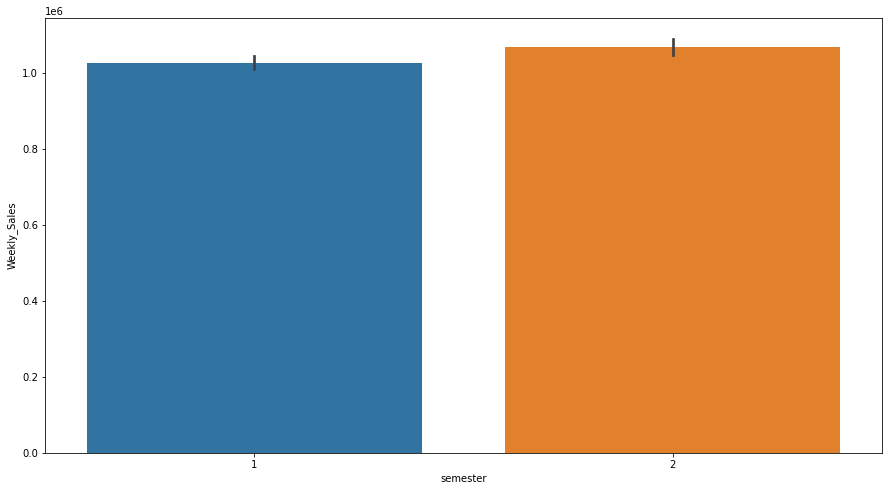

In [95]:
plt.figure(figsize=(15,8))
ax=sns.barplot(x='semester',y='Weekly_Sales',data=df)

Change dates into days by creating new variable.

In [99]:
day=df.Date.dt.strftime('%d').unique()
day

array(['02', '19', '26', '03', '04', '16', '23', '30', '05', '14', '21',
       '28', '06', '18', '25', '07', '08', '13', '20', '27', '09', '17',
       '24', '10', '15', '22', '29', '11', '12', '31', '01'], dtype=object)

For Store 1 – Build  prediction models to forecast demand

Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

In [100]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,semester
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,1
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,1


In [101]:
df1=df.loc[df['Store']==1]
df1

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,semester
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,1
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,1
...,...,...,...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908,2012,9,2
139,1,2012-05-10,1670785.97,0,68.55,3.617,223.181477,6.573,2012,5,1
140,1,2012-12-10,1573072.81,0,62.99,3.601,223.381296,6.573,2012,12,2
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573,2012,10,2


In [105]:
experiment_day_start=5
df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True)
df1['exp_day'] = (df1['Date']-df1['Date'].min()).dt.days + experiment_day_start

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11316\2528473243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11316\2528473243.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['exp_day'] = (df1['Date']-df1['Date'].min()).dt.days + experiment_day_start


In [106]:
df1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,semester,exp_day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,1,117
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,331
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,1,45
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,1,52
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,1,118


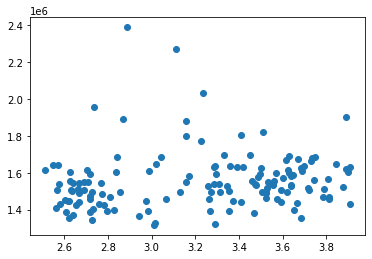

0.12459158039045631


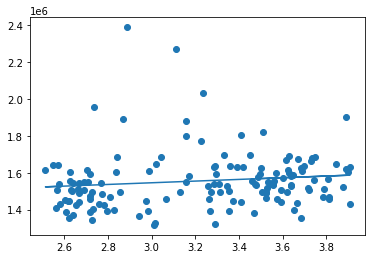

In [108]:
x = df1['Fuel_Price']
y = df1['Weekly_Sales']
plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)

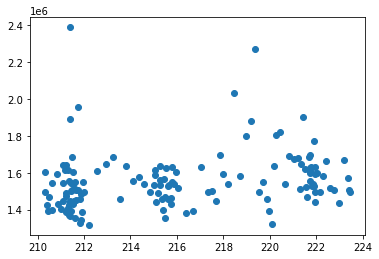

0.22540765942904453


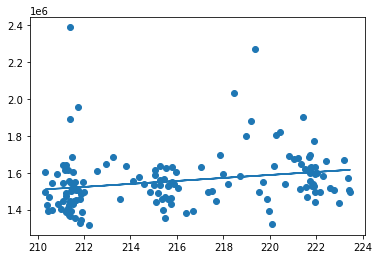

In [111]:
x = df1['CPI']
y = df1['Weekly_Sales']
plt.scatter(x,y)
plt.show()
slope,intercept,r,p,std_err=stats.linregress(x,y)
print(r) #r should be between -1 to 1
def myfunc(x):
    return slope*x+intercept
mymodel = list(map(myfunc, x))
plt.scatter(x,y)
plt.plot(x, mymodel)               

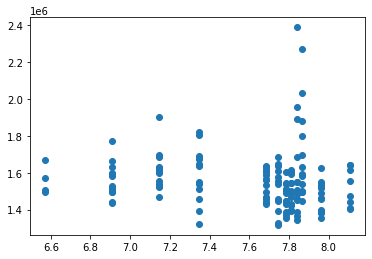

-0.09795539472957951


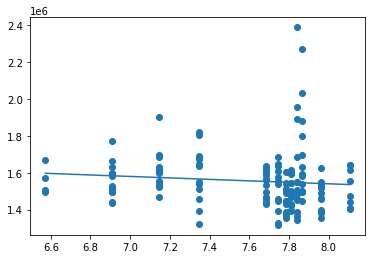

In [115]:
x = df1['Unemployment']
y = df1['Weekly_Sales']
plt.scatter(x,y)
plt.show()
slope, intercept, r, p,std_err = stats.linregress(x,y)
print(r) #r should be between _1 to 1
def myfunc(x):
    return slope*x+intercept
mymodel=list(map(myfunc,x))
plt.scatter(x,y)
plt.plot(x,mymodel)

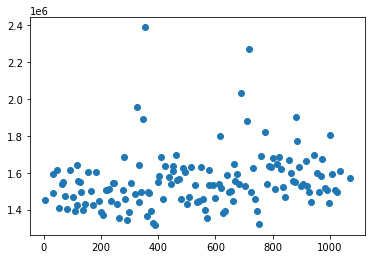

0.2176807594426468


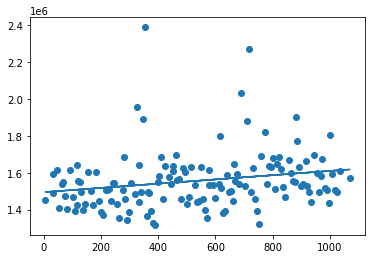

In [117]:
x = df1['exp_day']
y = df1['Weekly_Sales']
plt.scatter(x,y)
plt.show()
slope, intercept, r, p,std_err = stats.linregress(x,y)
print(r)
def myfunc(x):
    return slope*x+intercept
mymodel = list(map(myfunc, x))
plt.scatter(x,y)
plt.plot(x, mymodel)

In [129]:
x = df1[['Temperature','Fuel_Price','Unemployment','CPI','exp_day']]
y = df1['Weekly_Sales']

In [130]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [131]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [132]:
y_pred = regressor.predict(x_test)

In [133]:
predicteddf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predicteddf

,Actual,Predicted
45,1891034.93,1.535464e+06
118,1611096.05,1.580360e+06
16,1432069.95,1.467939e+06
56,1636263.41,1.530601e+06
22,1546074.18,1.480823e+06
7,1404429.92,1.546700e+06
108,1688420.76,1.597114e+06
134,1582083.40,1.553746e+06
130,1631135.79,1.541167e+06
101,1459601.17,1.621774e+06


In [134]:
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Temperature,-1686.498011
Fuel_Price,-53749.033464
Unemployment,100248.013105
CPI,15715.038939
exp_day,53.355518


In [136]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 112904.97914157528
Mean Squared Error: 22811390230.245533
Root Mean Squared Error: 151034.40081731556
